In [53]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
# Read in the dataset
ufo = pd.read_csv('https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/ufo.csv')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [52]:
# Read in the dataset
ufo2 = pd.read_csv(Path.joinpath(Path.cwd().parent, 'data', 'ufo2.csv'))
ufo2.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time',
       'sightings'],
      dtype='object')

In [55]:
# Check out the time variable
ufo['Time'].describe()

count              80543
unique             68901
top       7/4/2014 22:00
freq                  45
Name: Time, dtype: object

In [5]:
# What type of var is it?
ufo['Time'].dtype

dtype('O')

In [6]:
# convert a string to the datetime format
ufo['Time'] = pd.to_datetime(ufo['Time'])
ufo['Time'].dtype # Now it's dt format

dtype('<M8[ns]')

In [7]:
ufo['Date'] = ufo['Time'].dt.date
ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  sightings        Date  
0 1930-06-01 22:00:00          1  1930-06-01  
1 1930-06-30 20:00:00          1  1930-06-30  
2 1931-02-15 14:00:00          1  1931-02-15  
3 1931-06-01 13:00:00          1  1931-06-01  
4 1933-04-18 19:00:00          1  1933-04-18

In [8]:
# Create some additional variables
ufo['Year']=ufo['Time'].dt.year 
ufo['Month']=ufo['Time'].dt.month 
ufo['Day']=ufo['Time'].dt.day 
ufo['Hour']=ufo['Time'].dt.hour 
ufo['Weekday']=ufo['Time'].dt.weekday 
ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  sightings        Date  Year  Month  Day  Hour  Weekday  
0 1930-06-01 22:00:00          1  1930-06-01  1930      6    1    22        6  
1 1930-06-30 20:00:00          1  1930-06-30  1930      6   30    20        0  
2 1931-02-15 14:00:00          1  1931-02-15  1931      2   15    14        6  
3 1931-06-01 13:00:00          1  1931-06-01  1931      6    1    13        0  
4 1933-04-18 19:00:00          1  1933-04-18  1933      4   18    19        1

In [9]:
# also allows you to do datetime "math"
(ufo.Time.max() - ufo.Time.min()).days  

30776

In [10]:
# Create a weekday variable
ufo['weekday_name']=ufo['Weekday'].map({0:'0_Sunday',
                                       1: '1_Monday',
                                       2: '2_Tuesday',
                                       3: '3_Wednesday',
                                       4: '4_Thursday',
                                       5: '5_Friday',
                                       6: '6_Saturday'})
ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  sightings        Date  Year  Month  Day  Hour  Weekday  \
0 1930-06-01 22:00:00          1  1930-06-01  1930      6    1    22        6   
1 1930-06-30 20:00:00          1  1930-06-30  1930      6   30    20        0   
2 1931-02-15 14:00:00          1  1931-02-15  1931      2   15    14        6   
3 1931-06-01 13:00:00          1  1931-06-01  1931      6    1    13        0   
4 1933-04-18 19:00:00          1  1933-04-18  1933      4   18    19        1   

  weekday_name  
0   6_Saturday  
1     0_Sunday  
2   6_Saturday  
3     0_Sunday  
4     1_Monday

In [11]:
# Set the Time variable as the dataframe index (This will make plotting timelines easier)
# ufo=ufo.set_index('Time')

In [12]:
# which dates were the most frequent ufo sightings?
ufo['Date'].value_counts(ascending=False).head(5)

2014-07-04    258
2010-07-04    202
2012-07-04    188
1999-11-16    187
2013-07-04    177
Name: Date, dtype: int64

In [13]:
# Create a variable to count the number of sightings by date
ufo['sightings']=1
dates = ufo.groupby('Date')['sightings'].sum()
ufo = ufo.drop('sightings', axis=1)
dates.sort_values(ascending=False).head()

Date
2014-07-04    258
2010-07-04    202
2012-07-04    188
1999-11-16    187
2013-07-04    177
Name: sightings, dtype: int64

In [14]:
# Create a new dataframe of sightings
dates_df = pd.DataFrame(dates)
dates_df= dates_df.reset_index()
dates_df.sort_values('sightings', ascending=False).head()

Date  sightings
10496  2014-07-04        258
9035   2010-07-04        202
9766   2012-07-04        188
5168   1999-11-16        187
10131  2013-07-04        177

In [15]:
# Merge the daily number of sightings back into the original datafram
ufo2 = pd.merge(ufo, dates_df, on='Date', how='left')
ufo2.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time        Date  Year  Month  Day  Hour  Weekday  \
0 1930-06-01 22:00:00  1930-06-01  1930      6    1    22        6   
1 1930-06-30 20:00:00  1930-06-30  1930      6   30    20        0   
2 1931-02-15 14:00:00  1931-02-15  1931      2   15    14        6   
3 1931-06-01 13:00:00  1931-06-01  1931      6    1    13        0   
4 1933-04-18 19:00:00  1933-04-18  1933      4   18    19        1   

  weekday_name  sightings  
0   6_Saturday          1  
1     0_Sunday          1  
2   6_Saturday          1  
3     0_Sunday          1  
4     1_Monday          1

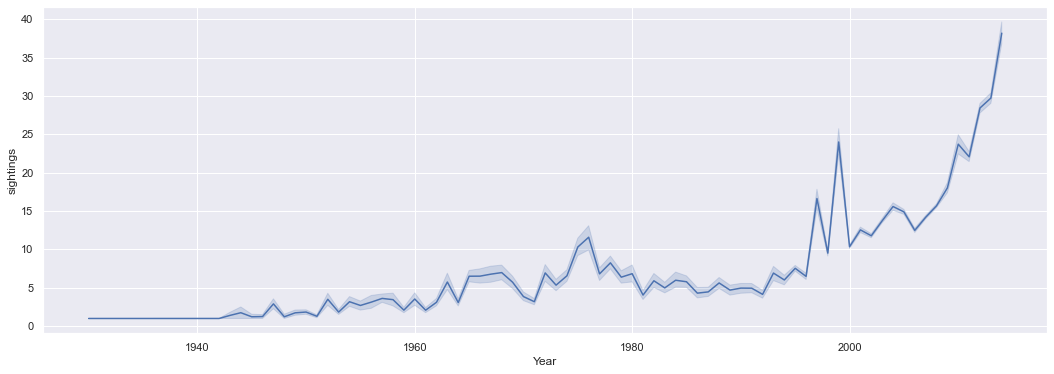

In [16]:
# Trend over years
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x='Year', y='sightings', data=ufo2);

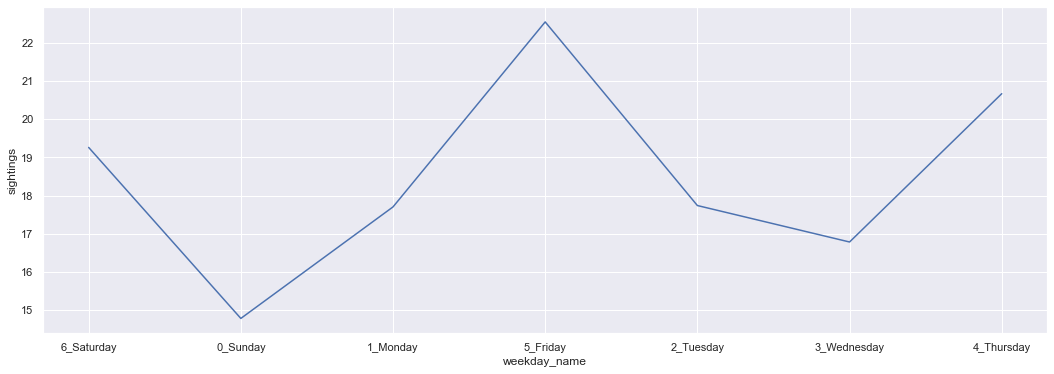

In [17]:
# Trend over weekday

sns.lineplot(x='weekday_name', y='sightings', data=ufo2, ci=None);

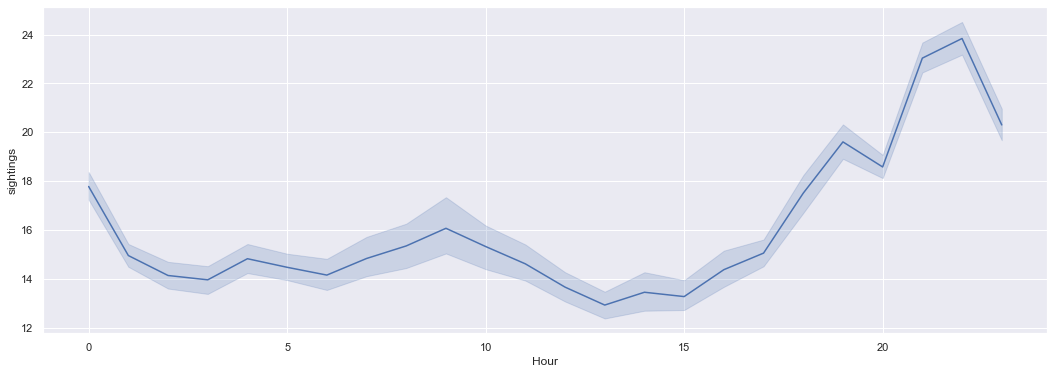

In [18]:
# Trend over time of day

sns.lineplot(x='Hour', y='sightings', data=ufo2);

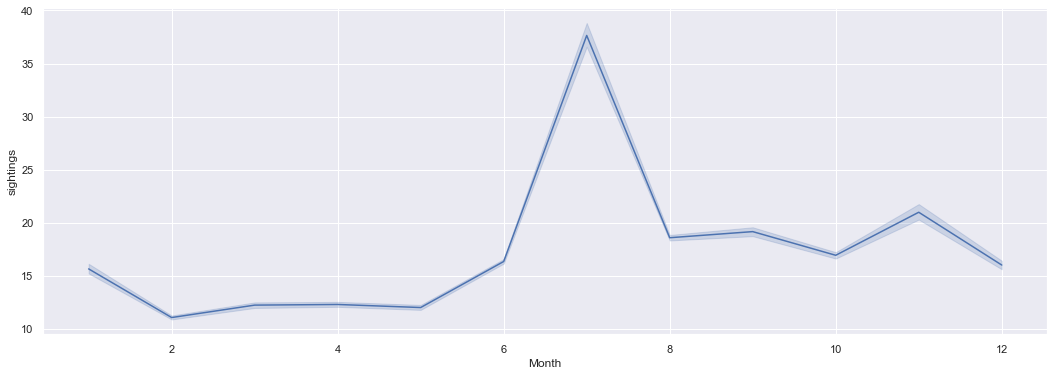

In [19]:
# Trend over month

sns.lineplot(x='Month', y='sightings', data=ufo2);

In [20]:
# Shorten the color categories
print(ufo['Colors Reported'].value_counts().head(5))
ufo['color']='other'
ufo.loc[ufo['Colors Reported']=='ORANGE', 'color']='orange'
ufo.loc[ufo['Colors Reported']=='RED', 'color']='red'
ufo.loc[ufo['Colors Reported']=='GREEN', 'color']='green'
ufo.head()

ORANGE    5216
RED       4809
GREEN     1897
BLUE      1855
YELLOW     842
Name: Colors Reported, dtype: int64


City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time        Date  Year  Month  Day  Hour  Weekday  \
0 1930-06-01 22:00:00  1930-06-01  1930      6    1    22        6   
1 1930-06-30 20:00:00  1930-06-30  1930      6   30    20        0   
2 1931-02-15 14:00:00  1931-02-15  1931      2   15    14        6   
3 1931-06-01 13:00:00  1931-06-01  1931      6    1    13        0   
4 1933-04-18 19:00:00  1933-04-18  1933      4   18    19        1   

  weekday_name  color  
0   6_Saturday  other  
1     0_Sunday  other  
2   6_Saturday  other  
3     0_Sunday  other  
4     1_Monday  other

In [21]:
# Alternative: create new columns for specific colors
import numpy as np
print(ufo['Colors Reported'].value_counts().head(5))
ufo['orange']=np.where(ufo['Colors Reported']=='ORANGE', 1, 0)
ufo['red']=np.where(ufo['Colors Reported']=='RED', 1, 0)
ufo['green']=np.where(ufo['Colors Reported']=='GREEN', 1, 0)
ufo['other_color']=np.where(ufo['orange']+ufo['red']+ufo['green']==0, 1, 0)
ufo.head()

ORANGE    5216
RED       4809
GREEN     1897
BLUE      1855
YELLOW     842
Name: Colors Reported, dtype: int64


City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time        Date  Year  Month  Day  Hour  Weekday  \
0 1930-06-01 22:00:00  1930-06-01  1930      6    1    22        6   
1 1930-06-30 20:00:00  1930-06-30  1930      6   30    20        0   
2 1931-02-15 14:00:00  1931-02-15  1931      2   15    14        6   
3 1931-06-01 13:00:00  1931-06-01  1931      6    1    13        0   
4 1933-04-18 19:00:00  1933-04-18  1933      4   18    19        1   

  weekday_name  color  orange  red  green  other_color  
0   6_Saturday  other       0    0      0            1  
1     0_Sunday  other       0    0      0            1  
2   6_Saturday  other       0    0      0            1  
3     0_Sunday  other       0    0      0            1  
4     1_Monday  other       0    0      0            1

In [22]:
# Collapse the dataframe on color and date
ufo['sighting']=1
dates = ufo.groupby(['Year', 'color'])['sighting'].sum()
dates_df = pd.DataFrame(dates)
dates_df= dates_df.reset_index()
dates_df.head()
dates_df[dates_df['Year']==2009]

Year   color  sighting
245  2009   green        82
246  2009  orange       220
247  2009   other      3689
248  2009     red       260

In [23]:
# Restrict the dataset (makes the chart easier to read)
dates_df2=dates_df.loc[(dates_df['Year']>2000) & (dates_df['Year']<2015) & (dates_df['color']!='other')]

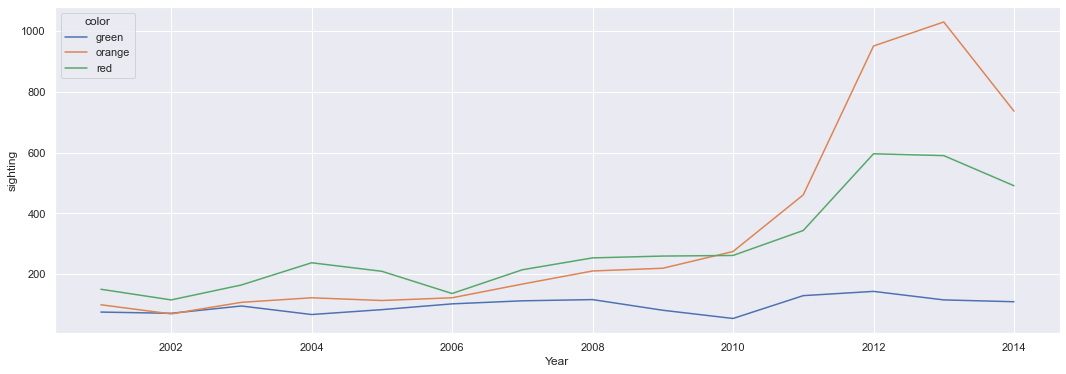

In [24]:
# Plot the lines
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x="Year", y="sighting", hue="color", data=dates_df2);

### All over again, with shapes

In [25]:
# Collapse the dataframe on shape and date
ufo['sighting']=1
dates = ufo.groupby(['Year', 'Shape Reported'])['sighting'].sum()
dates_df = pd.DataFrame(dates)
dates_df= dates_df.reset_index()
dates_df.head()
dates_df[dates_df['Year']==1995].head()

Year Shape Reported  sighting
762  1995        CHEVRON         9
763  1995          CIGAR        15
764  1995         CIRCLE        43
765  1995           CONE         5
766  1995          CROSS         2

In [26]:
# What are the most frequent shapes?
dates_df['Shape Reported'].value_counts().sort_values(ascending=False).head()

DISK      76
OVAL      71
LIGHT     70
CIGAR     70
CIRCLE    69
Name: Shape Reported, dtype: int64

In [27]:
test=pd.read_csv('https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/ufo.csv')
test.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [28]:
test['Shape Reported'].value_counts().sort_values(ascending=False).head()

LIGHT       16332
TRIANGLE     7816
CIRCLE       7725
FIREBALL     6249
OTHER        5506
Name: Shape Reported, dtype: int64

In [29]:
# Shorten the list of shapes.
def map_shapes(row):
    if row in ['LIGHT', 'CIRCLE', 'FIREBALL', 'TRIANGLE', 'SPHERE']:
        return row
    else:
        return 'OTHER'

test['Shape']=test['Shape Reported'].apply(map_shapes)
test['Shape'].value_counts()

OTHER       37190
LIGHT       16332
TRIANGLE     7816
CIRCLE       7725
FIREBALL     6249
SPHERE       5231
Name: Shape, dtype: int64

In [30]:
test['sighting']=1
# convert a string to the datetime format
test['Time'] = pd.to_datetime(ufo['Time'])
test['Year']=test['Time'].dt.year
test.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time     Shape  sighting  Year  
0 1930-06-01 22:00:00  TRIANGLE         1  1930  
1 1930-06-30 20:00:00     OTHER         1  1930  
2 1931-02-15 14:00:00     OTHER         1  1931  
3 1931-06-01 13:00:00     OTHER         1  1931  
4 1933-04-18 19:00:00     LIGHT         1  1933

In [31]:
test=test[test['Year']>2000]
test.shape
# test.to_csv('ufo_sightings.csv', index=False)

(62302, 8)

In [32]:
test.head()

City Colors Reported Shape Reported State  \
18241                     Flagstaff             NaN            NaN    AZ   
18242  Monroeville to Seven Springs             NaN       FIREBALL    PA   
18243                     Bremerton             NaN           DISK    WA   
18244                      Lakeland             NaN         CIRCLE    FL   
18245                      Woodland             NaN          LIGHT    CA   

                     Time     Shape  sighting  Year  
18241 2001-01-01 00:00:00     OTHER         1  2001  
18242 2001-01-01 00:00:00  FIREBALL         1  2001  
18243 2001-01-01 00:01:00     OTHER         1  2001  
18244 2001-01-01 00:01:00    CIRCLE         1  2001  
18245 2001-01-01 00:02:00     LIGHT         1  2001

In [33]:
dates = test.groupby(['Year', 'Shape'])['sighting'].sum()
dates_df = pd.DataFrame(dates)
dates_df.head()

sighting
Year Shape             
2001 CIRCLE         227
     FIREBALL       182
     LIGHT          629
     OTHER         1408
     SPHERE         164

In [34]:
# Set the year to the index
dates_df= dates_df.reset_index()

dates_df.head()

Year     Shape  sighting
0  2001    CIRCLE       227
1  2001  FIREBALL       182
2  2001     LIGHT       629
3  2001     OTHER      1408
4  2001    SPHERE       164

<AxesSubplot:xlabel='Year'>

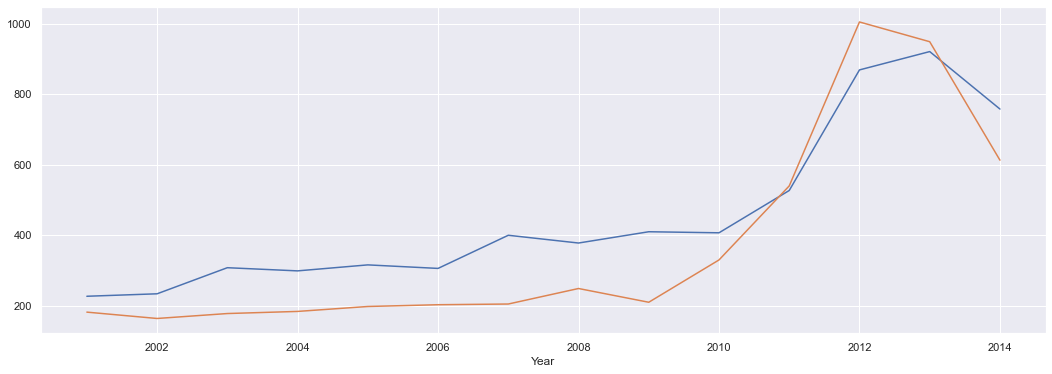

In [35]:
dates_df[dates_df['Shape']=='CIRCLE'].groupby(['Year'])['sighting'].mean().plot()
dates_df[dates_df['Shape']=='FIREBALL'].groupby(['Year'])['sighting'].mean().plot()

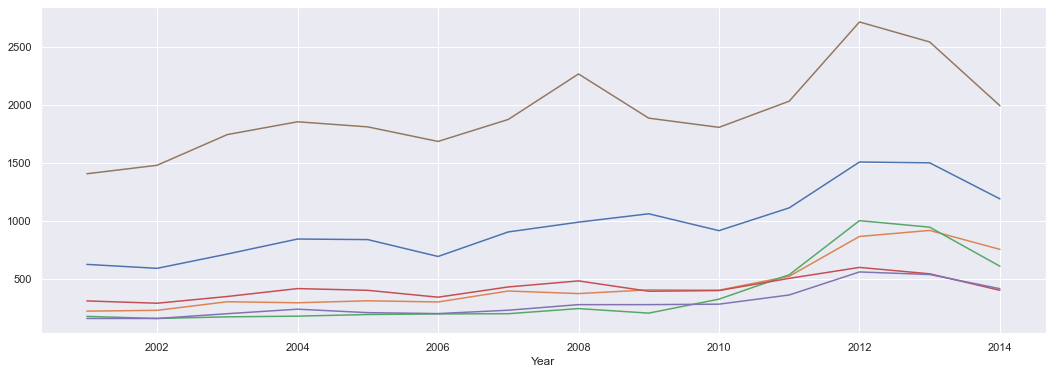

In [36]:
for shape in ['LIGHT', 'CIRCLE', 'FIREBALL', 'TRIANGLE', 'SPHERE', 'OTHER']:
    dates_df[dates_df['Shape']==shape].groupby(['Year'])['sighting'].mean().plot()

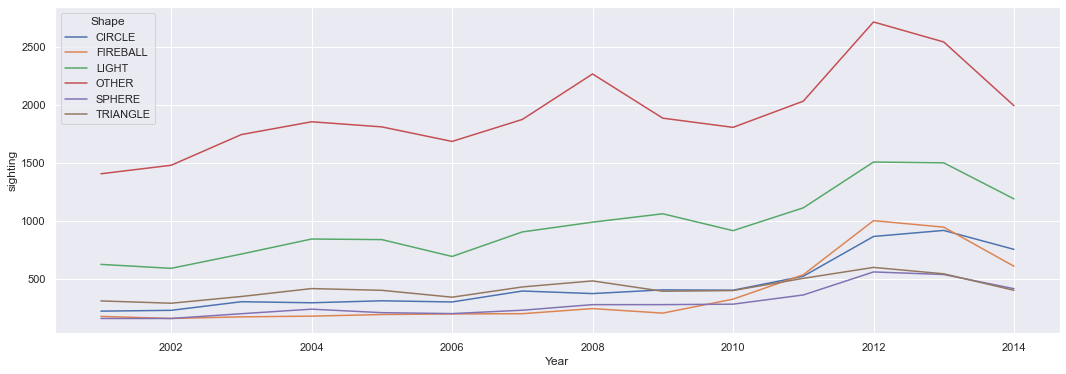

In [37]:
# Plot the lines
sns.set(rc={'figure.figsize':(18, 6)})
sns.lineplot(x="Year", y="sighting", hue="Shape", data=dates_df);

## With plotly

How to run plotly in a colab notebook:

https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

how to embed plotly in medium: https://towardsdatascience.com/how-to-create-a-plotly-visualization-and-embed-it-on-websites-517c1a78568b

In [38]:
import plotly
import plotly.graph_objs as go

#### Timeline by shapes: Fireball

In [39]:
dates_df.head()

Year     Shape  sighting
0  2001    CIRCLE       227
1  2001  FIREBALL       182
2  2001     LIGHT       629
3  2001     OTHER      1408
4  2001    SPHERE       164

In [40]:
# use groupby to create the data
fireballs = dates_df[dates_df['Shape']=='FIREBALL'].groupby(['Year'])['sighting'].mean()
fireballs

Year
2001     182.0
2002     164.0
2003     178.0
2004     184.0
2005     198.0
2006     203.0
2007     205.0
2008     249.0
2009     210.0
2010     330.0
2011     540.0
2012    1005.0
2013     949.0
2014     613.0
Name: sighting, dtype: float64

In [41]:
# create a trace
trace = go.Scatter(
    x = fireballs.index,
    y = fireballs.values,
    mode = 'lines',
    marker = {'color': 'red'},
#     hoverinfo="text",
    hovertemplate = 'People saw %{y} fireballs in the year %{x}',
    name = 'Fireballs'
)
# assign traces to data
data = [trace]
layout = go.Layout(
    title = 'fireballs in the sky'
)


In [42]:

# Show the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

#### Timeline by shapes: Multiple

In [43]:
# use groupby to create the data
def make_shapes_data(shape):
  output = dates_df[dates_df['Shape']==shape].groupby(['Year'])['sighting'].mean()
  return output

In [44]:
# apply the function to all shapes
shapes = ['LIGHT', 'CIRCLE', 'FIREBALL', 'TRIANGLE', 'SPHERE', 'OTHER']
outputs = list(map(make_shapes_data, shapes))
outputs[0]

Year
2001     629.0
2002     595.0
2003     718.0
2004     847.0
2005     842.0
2006     697.0
2007     908.0
2008     992.0
2009    1064.0
2010     919.0
2011    1115.0
2012    1509.0
2013    1502.0
2014    1192.0
Name: sighting, dtype: float64

In [45]:
# list of colors
colors = ['red', 'orange', 'yellow', 'green', 'purple', 'blue']

# create a trace
traces={}
for x in range(0,6):
    traces[x] = go.Scatter(
        x = outputs[x].index,
        y = outputs[x].values,
        mode =  'lines',
        marker = {'color': colors[x]},
        hovertemplate = 'People saw %{y} fireballs in the year %{x}',
        name = shapes[x]
    )
# assign traces to data
data = [traces[0], traces[1], traces[2], traces[3], traces[4], traces[5]]
layout = go.Layout(
    title = 'shapes in the sky'
)


In [46]:

# Show the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

## Make a map

In [47]:
test.head()

City Colors Reported Shape Reported State  \
18241                     Flagstaff             NaN            NaN    AZ   
18242  Monroeville to Seven Springs             NaN       FIREBALL    PA   
18243                     Bremerton             NaN           DISK    WA   
18244                      Lakeland             NaN         CIRCLE    FL   
18245                      Woodland             NaN          LIGHT    CA   

                     Time     Shape  sighting  Year  
18241 2001-01-01 00:00:00     OTHER         1  2001  
18242 2001-01-01 00:00:00  FIREBALL         1  2001  
18243 2001-01-01 00:01:00     OTHER         1  2001  
18244 2001-01-01 00:01:00    CIRCLE         1  2001  
18245 2001-01-01 00:02:00     LIGHT         1  2001

In [48]:
# create summary data by state
states_df = test.groupby(['State', 'Shape'])[['sighting']].sum()
states_df.head(10)

sighting
State Shape             
AK    CIRCLE          29
      FIREBALL        17
      LIGHT           84
      OTHER          113
      SPHERE          19
      TRIANGLE        25
AL    CIRCLE          63
      FIREBALL        46
      LIGHT          134
      OTHER          263

In [49]:
# Set the state to the index
states_df= states_df.reset_index()
states_df.head()

State     Shape  sighting
0    AK    CIRCLE        29
1    AK  FIREBALL        17
2    AK     LIGHT        84
3    AK     OTHER       113
4    AK    SPHERE        19

In [50]:
# limit to one shape
fireballs_df=states_df[states_df['Shape']=='FIREBALL']
fireballs_df.head()

State     Shape  sighting
1     AK  FIREBALL        17
7     AL  FIREBALL        46
13    AR  FIREBALL        21
19    AZ  FIREBALL       162
25    CA  FIREBALL       635

In [51]:
data=go.Choropleth(
    locations=fireballs_df['State'], # Spatial coordinates
    z = fireballs_df['sighting'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = 'UFO sightings',
#     hoverinfo="text",
    hovertext = 'fireballs',
)


fig = go.Figure([data])

fig.update_layout(
    title_text = 'Sightings by state',
    geo_scope='usa',
    width=1200,
    height=800
)

# Show the fig
fig